In [1]:
from plotnine.data import *
from plotnine import *
import pandas as pd
import numpy as np
from gapminder import gapminder
import pyreadr #used to read rda files

## Chapter 2: Get started

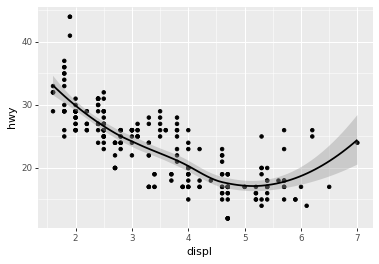

<ggplot: (8768149751257)>

In [2]:
'''
display ggplot in chain style
'''

(
    ggplot(data=mpg,
           mapping=aes(x='displ', y='hwy')) +
    geom_point() +
    geom_smooth()
)

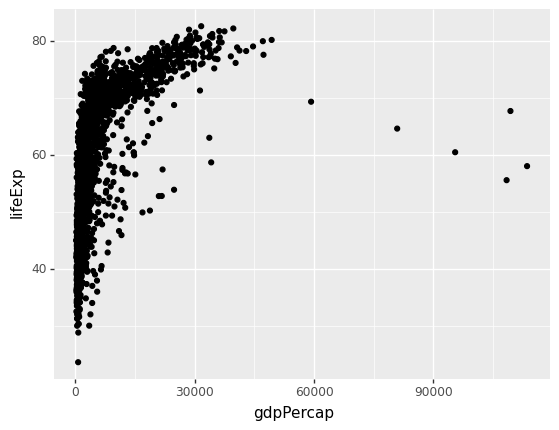

<ggplot: (8768139012331)>

In [3]:
'''
gapminder dataset was imported in an standalone library
'''
(
    ggplot(data=gapminder) + 
    geom_point(mapping=aes(x='gdpPercap', y='lifeExp'))
)

***

## Chapter 3: Make a plot

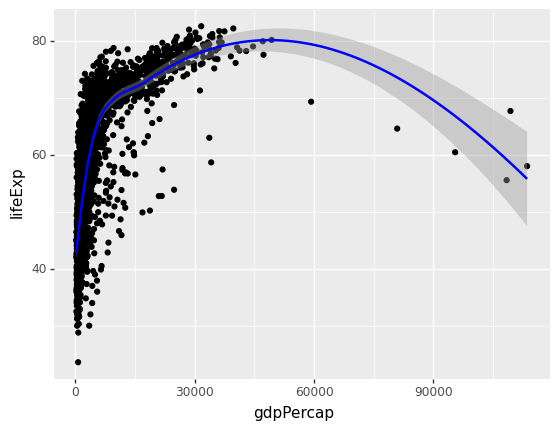

<ggplot: (8768138979612)>

In [4]:
(
    ggplot(data=gapminder,
           mapping=aes(x='gdpPercap', y='lifeExp')) + 
    geom_point() + 
    geom_smooth(method='loess', color='blue')
)

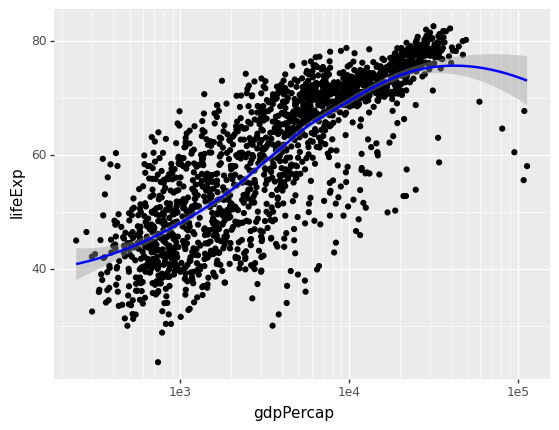

<ggplot: (8768138888945)>

In [5]:
'''
scales x with log transformation
'''
(
    ggplot(data=gapminder,
           mapping=aes(x='gdpPercap', y='lifeExp')) + 
    geom_point() +
    geom_smooth(method='loess', color='blue') +
    scale_x_log10()
)

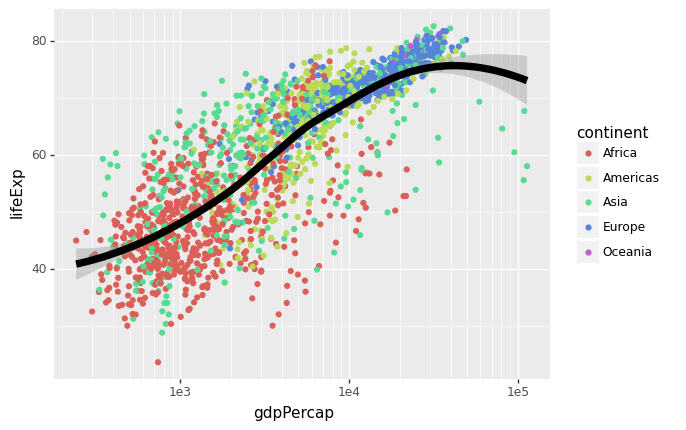

<ggplot: (8768138853346)>

In [6]:
'''
here we dont put color in ggplot, since we only need to applying color only
upon geom_point instead entire ggplot
'''
(
    ggplot(data=gapminder, 
           mapping=aes(x='gdpPercap', y='lifeExp')) +
    geom_point(mapping=aes(color='continent')) + #here we are applying color
    geom_smooth(method='loess', color='black', size=3) +
    scale_x_log10()
)

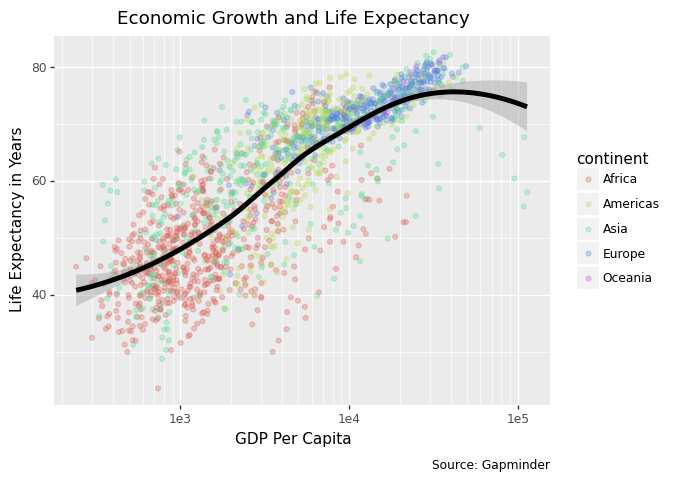

<ggplot: (8768138239332)>

In [7]:
(
    ggplot(data=gapminder,
           mapping=aes(x='gdpPercap', y='lifeExp')) + 
    geom_point(mapping=aes(color='continent'), alpha=0.3) +
    geom_smooth(method='loess', size=2) +
    scale_x_log10() +
    labs(x='GDP Per Capita', y='Life Expectancy in Years',
         title='Economic Growth and Life Expectancy',
         caption='Source: Gapminder')
)

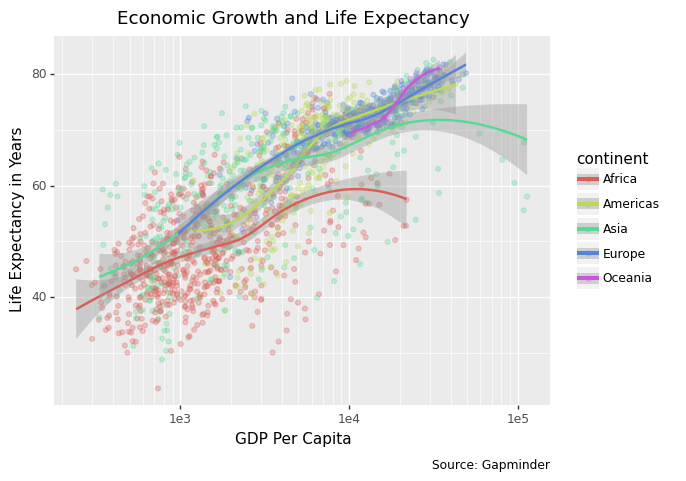

<ggplot: (8768138177521)>

In [8]:
(
    ggplot(data=gapminder,
           mapping=aes(x='gdpPercap', y='lifeExp')) +
    geom_point(mapping=aes(color='continent'), alpha=0.3) +
    geom_smooth(mapping=aes(color='continent'), method='loess') +
    scale_x_log10() +
    labs(x='GDP Per Capita', y='Life Expectancy in Years',
         title='Economic Growth and Life Expectancy',
         caption='Source: Gapminder')
)

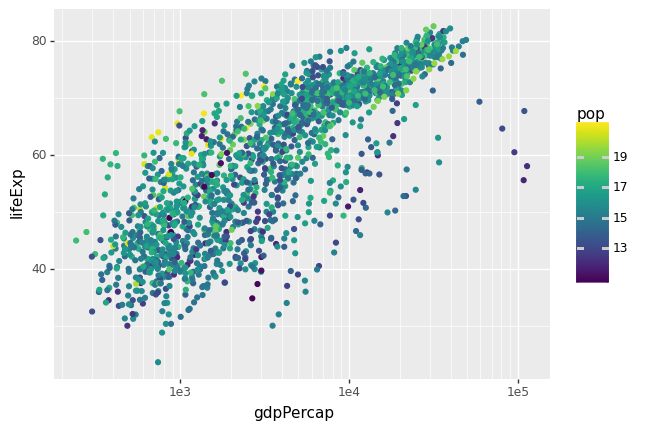

<ggplot: (8768138086060)>

In [9]:
'''
using numpy library within the ggplot
'''
(
    ggplot(data=gapminder,
           mapping=aes(x='gdpPercap', y='lifeExp')) +
    geom_point(mapping=aes(color=np.log(gapminder['pop']))) +
    scale_x_log10()
)

***

## Show the right numbers

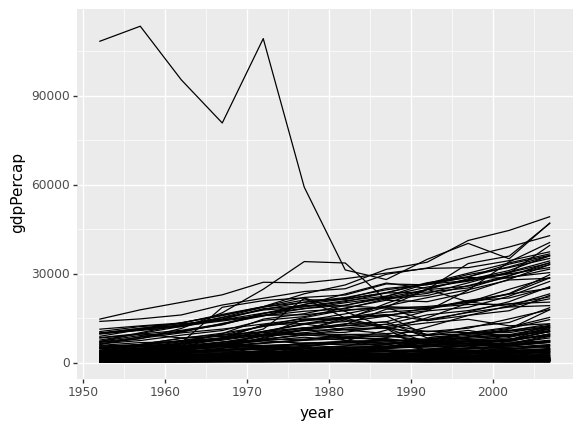

<ggplot: (8768138187216)>

In [10]:
'''
plot group without facet wrap
'''
(
    ggplot(data=gapminder,
           mapping=aes(x='year', y='gdpPercap')) +
    geom_line(mapping=aes(group='country'))
)

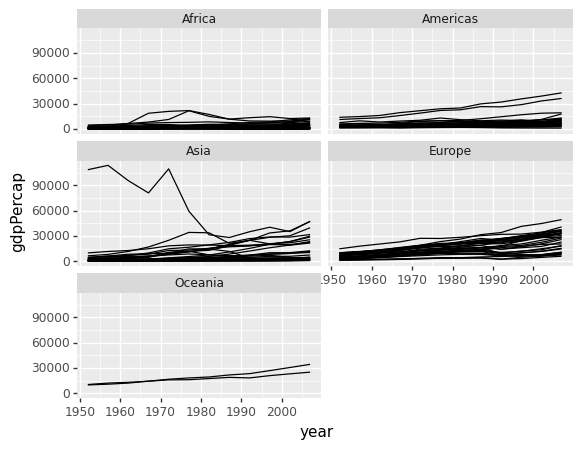

<ggplot: (8768138115928)>

In [11]:
'''
plot group with faces to make small multiplies
'''
(
    ggplot(data=gapminder, 
           mapping=aes(x='year', y='gdpPercap')) +
    geom_line(mapping=aes(group='country')) +
    facet_wrap('continent', ncol=2, nrow=3)
)

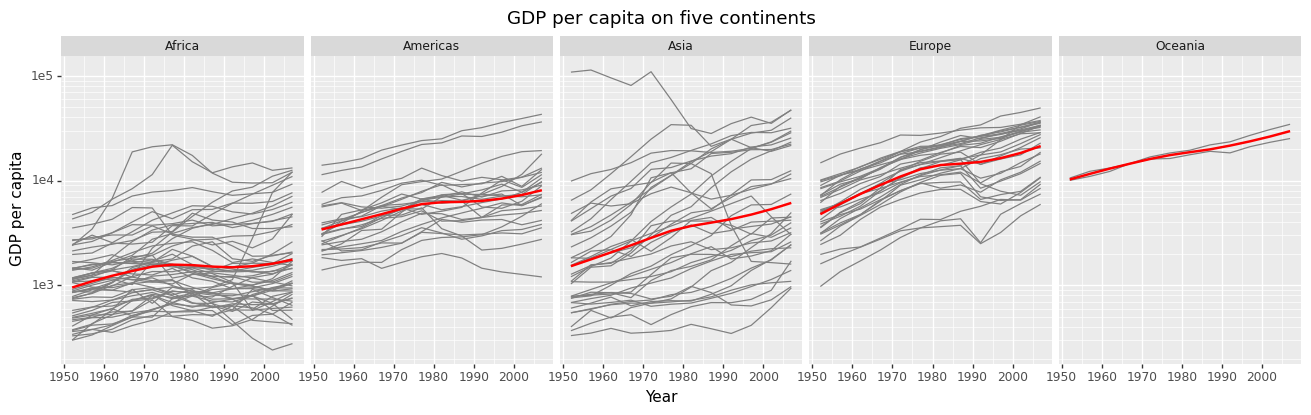

<ggplot: (8768132321018)>

In [12]:
'''
more realistic facet wrap
'''
(
    ggplot(data=gapminder,
          mapping=aes(x='year', y='gdpPercap')) +
    geom_line(mapping=aes(group='country'), color='gray') +
    geom_smooth(method='loess', size=1, se=False, color='red') +
    scale_y_log10() +
    facet_wrap('continent', ncol=5, nrow=1) +
    labs(x='Year', y='GDP per capita',
         title='GDP per capita on five continents') +
    theme(figure_size=(16, 4)) #to set the figure size
)

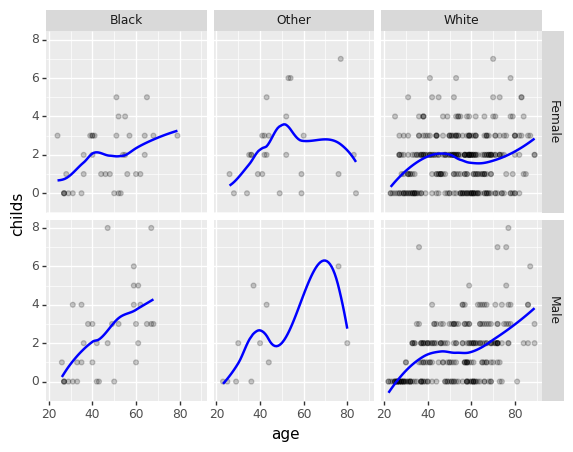

<ggplot: (8768138984614)>

In [13]:
'''
Two categorical facet (sex, race)
'''
gss_sm_df = pyreadr.read_r('./gss_sm.rda') #load rda file
gss_sm_df = gss_sm_df['gss_sm']
gss_sm_df = gss_sm_df.dropna()

(
    ggplot(data=gss_sm_df,
           mapping=aes(x='age', y='childs')) +
    geom_point(alpha=0.2) +
    geom_smooth(method='loess', color='blue', se=False) +
    facet_grid(['sex', 'race'])
)

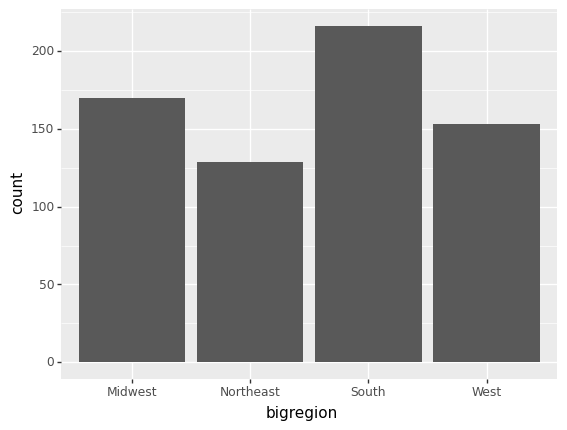

<ggplot: (8768132153646)>

In [14]:
'''
(Bar) plot without statistical function
'''
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='bigregion'))
)

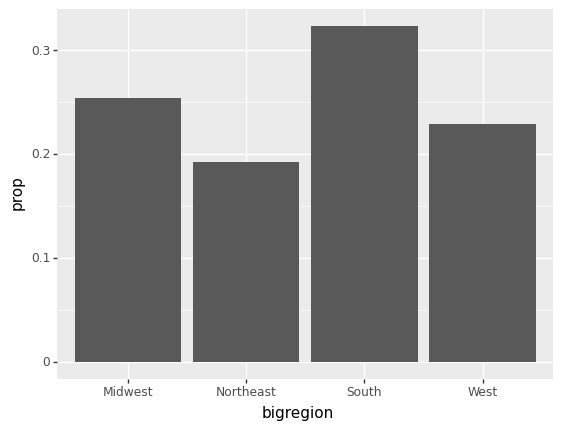

<ggplot: (8768132128055)>

In [15]:
'''
(Bar) plot wit statistical function

We use statistical function ..prop.. and use group=1 means use whole dataset as denominator 
for ..prop.. 
'''
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='bigregion',
                         y='..prop..', group=1)) )

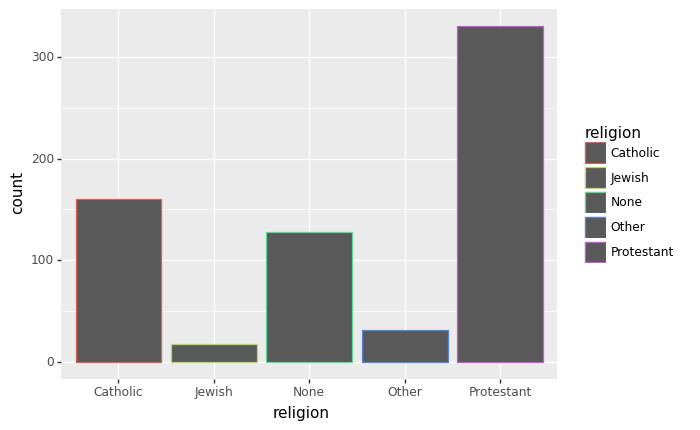

<ggplot: (8768132092685)>

In [16]:
'''
Difference between color and fill
'''

#color
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='religion', color='religion'))
)

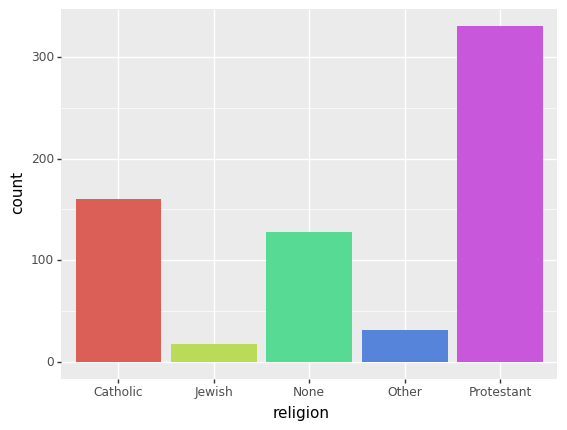

<ggplot: (8768138982160)>

In [17]:
#fill

(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='religion', fill='religion')) +
    guides(fill=False) # no need for a legend
)

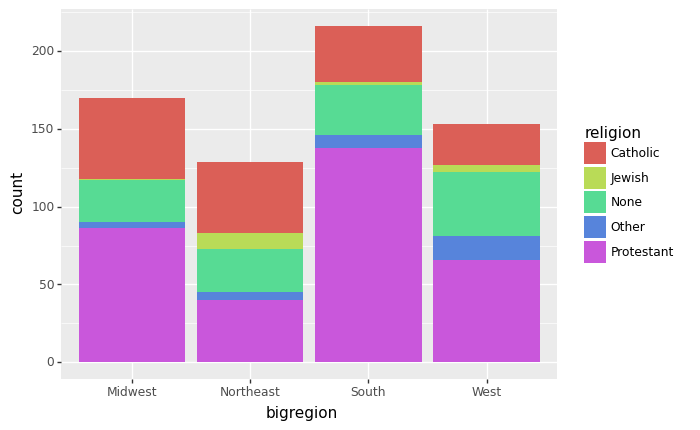

<ggplot: (8768132404402)>

In [19]:
'''
stacked bar graph with and without statistical function (proportion)
'''
#without 
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='bigregion', fill='religion'))
)

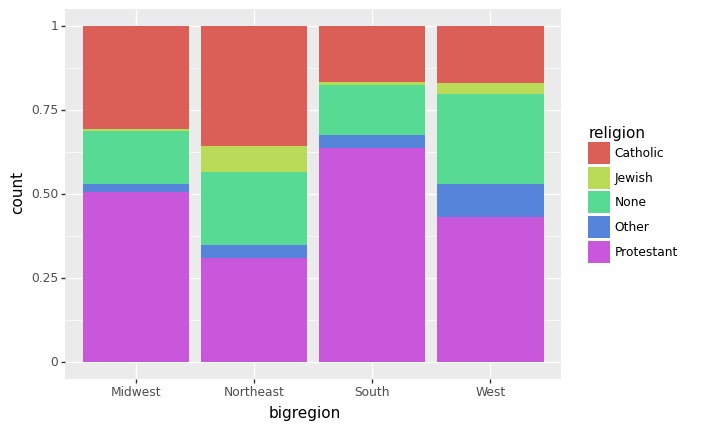

<ggplot: (8768132535525)>

In [21]:
#with
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='bigregion', fill='religion'),
             position='fill') 
)

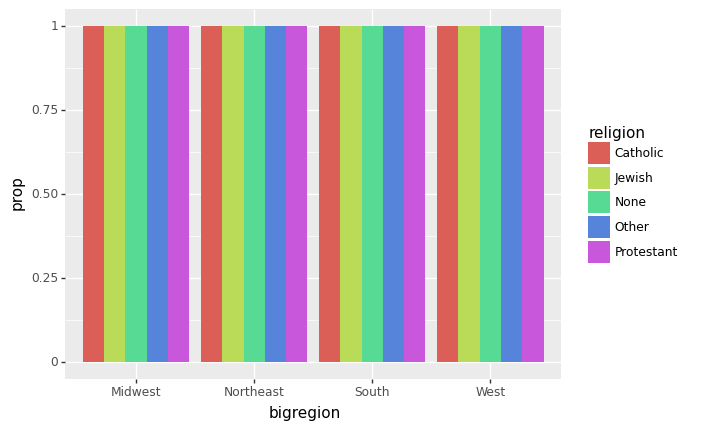

<ggplot: (8768131135392)>

In [22]:
'''
Plot with dodge bar and statistical function and grouping
'''
#without grouping (this is incorrect way to have a dodge bar chart)
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='bigregion', y='..prop..', fill='religion'),
             position='dodge')
)

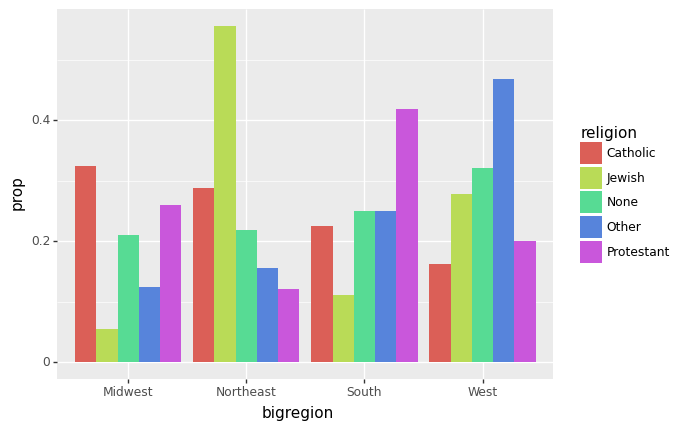

<ggplot: (8768132470059)>

In [23]:
#with grouping (this is correct way to have dodge bar chart)
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='bigregion', y='..prop..', fill='religion', group='religion'),
             position='dodge')
)

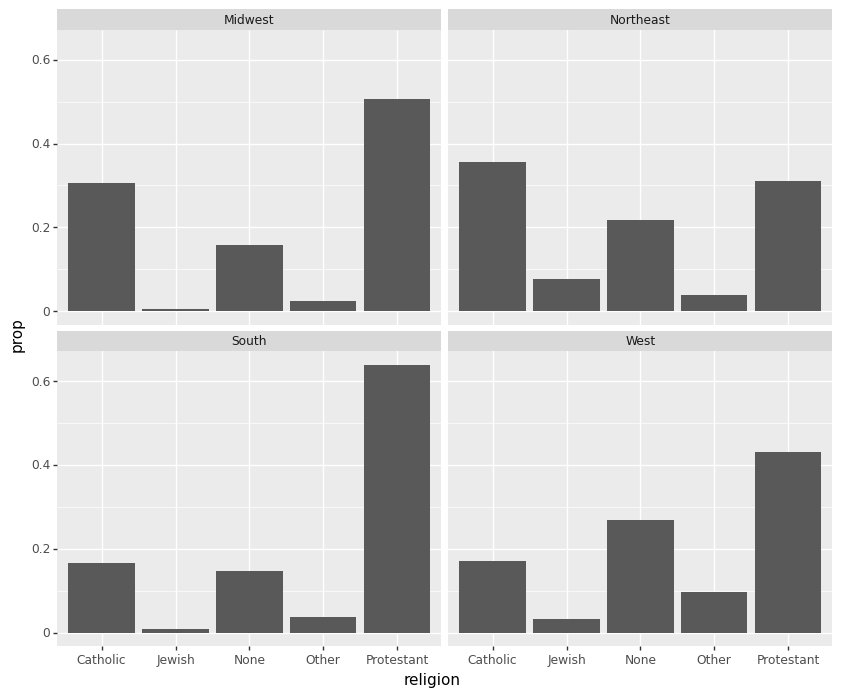

<ggplot: (8768130908293)>

In [27]:
'''
dodge bar chart and facet_warp
'''
(
    ggplot(data=gss_sm_df) +
    geom_bar(mapping=aes(x='religion', y='..prop..', group='bigregion'),#remember, facet_wrap needs to be grouped
             position='dodge') +
    facet_wrap('bigregion', ncol=2) +
    theme(figure_size=(10, 8))
)

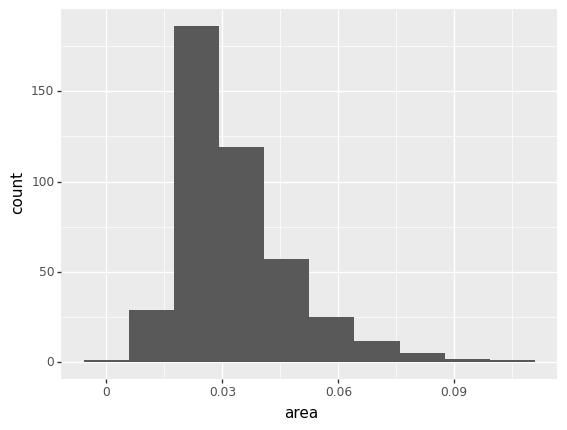

<ggplot: (8768129876441)>

In [32]:
'''
histogram and density plot
'''
midwest_df = pd.read_csv('./midwest.csv')
(
    ggplot(data=midwest_df) +
    geom_histogram(mapping=aes(x='area'), bins=10)
)

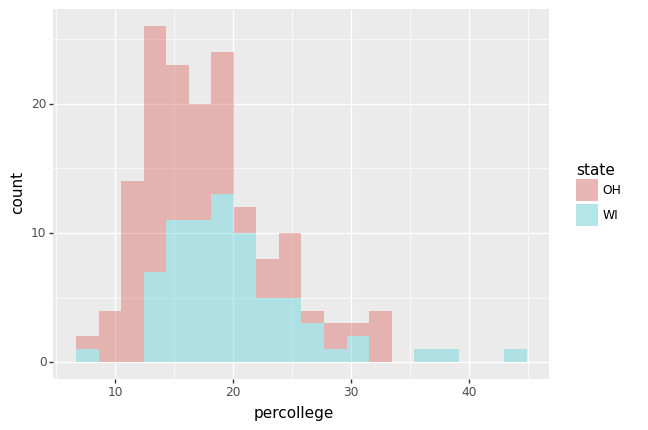

<ggplot: (8768132601483)>

In [53]:
subselect = midwest_df[(midwest_df.state == 'OH') | (midwest_df.state == 'WI')] #subselect with multiple conditions
(
    ggplot(data=subselect) + 
    geom_histogram(mapping=aes(x='percollege', fill='state'), 
                   alpha=0.4, bins=20)
)

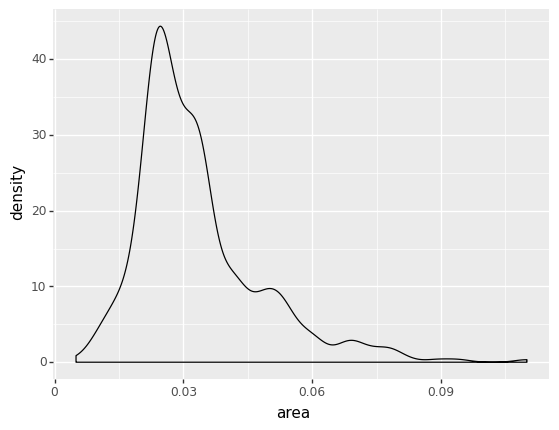

<ggplot: (8768138293306)>

In [58]:
(
    ggplot(data=midwest_df) +
    geom_density(mapping=aes(x='area'), 
                 stat='density')
)

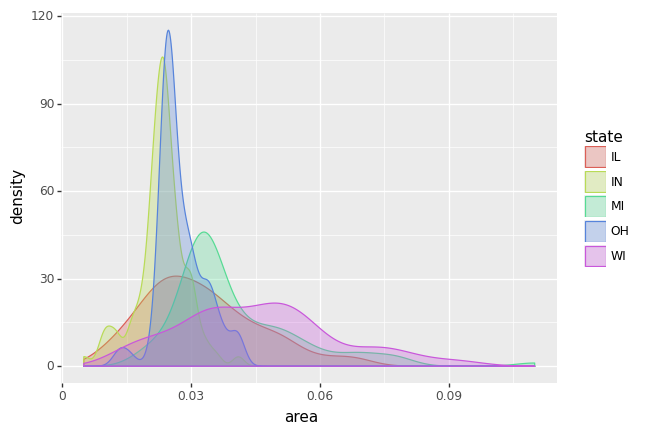

<ggplot: (8768138055560)>

In [59]:
(
    ggplot(data=midwest_df) +
    geom_density(mapping=aes(x='area', fill='state', color='state'), 
                 alpha=0.3)
)

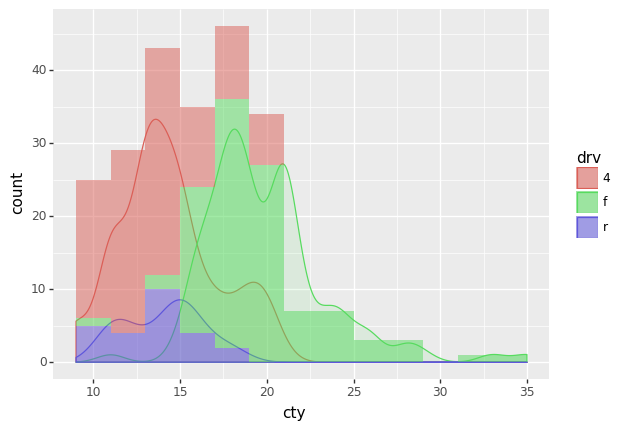

<ggplot: (8768130193273)>

In [64]:
'''
combination of density and histogram
'''
binwidth=2
(
    ggplot(data=mpg, 
           mapping=aes(x='cty', fill='drv')) + # we put common mapping in ggplot
    geom_density(mapping=aes(y=after_stat('count*binwidth'), color='drv'), 
                 alpha=0.1) +
    geom_histogram(mapping=aes(y=after_stat('count')), 
                   binwidth=binwidth, alpha=0.5) +
    labs(y='count')
)

/home/anggi/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:392: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


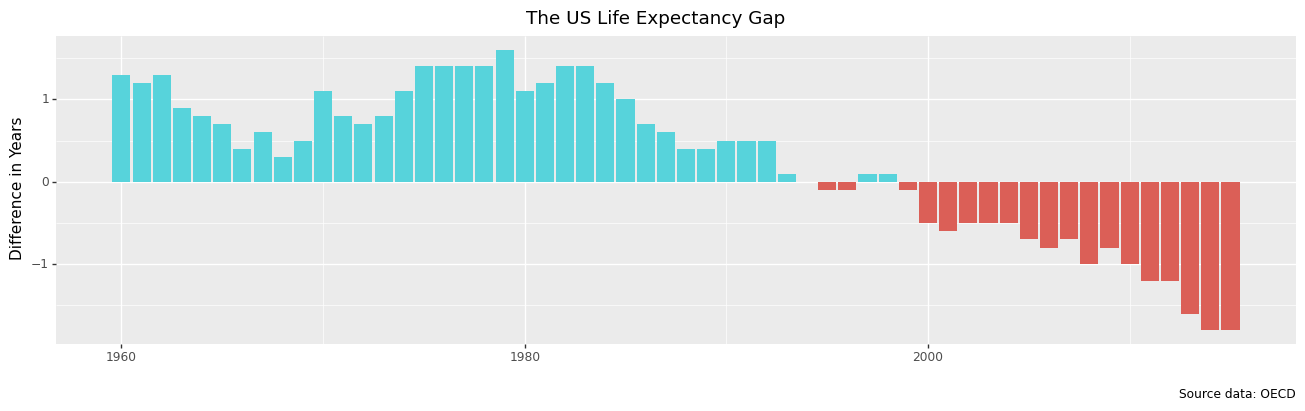

<ggplot: (8768128849484)>

In [71]:
'''
example of beautiful plot
'''
oecd_sum = pyreadr.read_r('./oecd_sum.rda')
oecd_sum_df = oecd_sum['oecd_sum']
(
    ggplot(data=oecd_sum_df) +
    geom_col(mapping=aes(x='year', y='diff', fill='hi_lo')) + 
    guides(fill=False) +
    labs(x=None, y='Difference in Years',
         title='The US Life Expectancy Gap',
         caption= 'Source data: OECD') +
    theme(figure_size=(16, 4))
)